## Azucena 5kb resolution TAD boundaries ranked by insulation score
## Comparison of first and forth quartile
Ranking done by Sonal Gupta

In [4]:
!wc -l /scratch/ak8725/az_mrg/tadBoundary_LowInsulation.bed
!wc -l /scratch/ak8725/az_mrg/tadBoundary_HighInsulation.bed

408 /scratch/ak8725/az_mrg/tadBoundary_LowInsulation.bed
418 /scratch/ak8725/az_mrg/tadBoundary_HighInsulation.bed


In [1]:
#analysis of all features
import os
working_directory = '/scratch/ak8725/az_mrg/insulation/'
os.chdir(working_directory)

from pybedtools import BedTool

# Create a dictionary to store BedTool objects with their names as keys
bedtools_dict = {
    'pro': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PRO-seq.bedgraph'),
    'meth': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/methylation_from_zoe.bedgraph'),
    'H3K18ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K18ac.bedgraph'),
    'H3K27ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27ac.bedgraph'),
    'H3K27me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27me3.bedgraph'),
    'H3K4me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K4me3.bedgraph'),
    'rho': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/rho.bedgraph'),
    'phast': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PhastCons8wayChrAll.bedgraph'),
    'genes': BedTool('/scratch/ak8725/npb_feature_tracks/npb_genes_per_500bp.bedgraph'),
    'gc': BedTool('/scratch/ak8725/npb_feature_tracks/npb_GC_content_per_500bp.bedgraph'),
    'sv': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sv_per_500bp.bedgraph'),
    'snp': BedTool('/scratch/ak8725/npb_feature_tracks/npb_snp_per_500bp.bedgraph'),
    'te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_te_per_500bp.bedgraph'),
    'dna_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_dna_te_per_500bp.bedgraph'),
    'gypsy': BedTool('/scratch/ak8725/npb_feature_tracks/npb_gypsy_per_500bp.bedgraph'),
    'copia': BedTool('/scratch/ak8725/npb_feature_tracks/npb_copia_per_500bp.bedgraph'),
    'line': BedTool('/scratch/ak8725/npb_feature_tracks/npb_line_per_500bp.bedgraph'),
    'sine': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sine_per_500bp.bedgraph'),
    'rest_retro_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_rest_retro_te_per_500bp.bedgraph'),
    'ssd': BedTool('/scratch/ak8725/npb_feature_tracks/ssd_genes_per_500bp.bedgraph'),
    'wgd': BedTool('/scratch/ak8725/npb_feature_tracks/wgd_genes_per_500bp.bedgraph'),
    'tips': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_per_500bp.bedgraph'),
    'tips_del': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_del_per_500bp.bedgraph'),
    'tips_ins': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_ins_per_500bp.bedgraph'),
    'exp': BedTool('/scratch/ak8725/expression/Azu_field2017_Normal.bed')
}

low = BedTool('/scratch/ak8725/az_mrg/insulation/tadBoundary_LowInsulation.bed')
high = BedTool('/scratch/ak8725/az_mrg/insulation/tadBoundary_HighInsulation.bed')

high = high.cut(range(3))
low = low.cut(range(3))

# Define the list of output file names
output_files = [
    'low.txt',
    'high.txt'
]

#calculating mean feature value per mode
for obj_name, obj in bedtools_dict.items():
    for output_file in output_files:
        output_name = f'{obj_name}_{output_file}'  # Generate output file name based on object name and output file type
        
        # Use mode1 and mode2 BedTool objects instead of obj
        if "low" in output_name:
            result = low.map(obj, c=4, o='mean', output=output_name)
        elif "high" in output_name:
            result = high.map(obj, c=4, o='mean', output=output_name)
        
        print(f'Mean {obj_name} per window calculated, output saved as {output_name}')

ModuleNotFoundError: No module named 'pybedtools'

In [5]:
import os
working_directory = '/scratch/ak8725/az_mrg/insulation/'
os.chdir(working_directory)

import pandas as pd
from scipy import stats

from pybedtools import BedTool
# Create a dictionary to store BedTool objects with their names as keys
bedtools_dict = {
    'pro': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PRO-seq.bedgraph'),
    'meth': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/methylation_from_zoe.bedgraph'),
    'H3K18ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K18ac.bedgraph'),
    'H3K27ac': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27ac.bedgraph'),
    'H3K27me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27me3.bedgraph'),
    'H3K4me3': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K4me3.bedgraph'),
    'rho': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/rho.bedgraph'),
    'phast': BedTool('/scratch/ak8725/az_mrg/fitcons/from_zoe/PhastCons8wayChrAll.bedgraph'),
    'genes': BedTool('/scratch/ak8725/npb_feature_tracks/npb_genes_per_500bp.bedgraph'),
    'gc': BedTool('/scratch/ak8725/npb_feature_tracks/npb_GC_content_per_500bp.bedgraph'),
    'sv': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sv_per_500bp.bedgraph'),
    'snp': BedTool('/scratch/ak8725/npb_feature_tracks/npb_snp_per_500bp.bedgraph'),
    'te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_te_per_500bp.bedgraph'),
    'dna_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_dna_te_per_500bp.bedgraph'),
    'gypsy': BedTool('/scratch/ak8725/npb_feature_tracks/npb_gypsy_per_500bp.bedgraph'),
    'copia': BedTool('/scratch/ak8725/npb_feature_tracks/npb_copia_per_500bp.bedgraph'),
    'line': BedTool('/scratch/ak8725/npb_feature_tracks/npb_line_per_500bp.bedgraph'),
    'sine': BedTool('/scratch/ak8725/npb_feature_tracks/npb_sine_per_500bp.bedgraph'),
    'rest_retro_te': BedTool('/scratch/ak8725/npb_feature_tracks/npb_rest_retro_te_per_500bp.bedgraph'),
    'ssd': BedTool('/scratch/ak8725/npb_feature_tracks/ssd_genes_per_500bp.bedgraph'),
    'wgd': BedTool('/scratch/ak8725/npb_feature_tracks/wgd_genes_per_500bp.bedgraph'),
    'tips': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_per_500bp.bedgraph'),
    'tips_del': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_del_per_500bp.bedgraph'),
    'tips_ins': BedTool('/scratch/ak8725/npb_feature_tracks/omer_tips_ins_per_500bp.bedgraph'),
    'exp': BedTool('/scratch/ak8725/expression/Azu_field2017_Normal.bed')
}

# Initialize an empty list to store p-values
p_values = []

# Iterate through the BedTool objects in bedtools_dict
for key, obj in bedtools_dict.items():
    # Generate the output file names for mode1 and mode2 based on the key
    low_file = f'{key}_low.txt'
    high_file = f'{key}_high.txt'
    
    # Load data from right and left files
    low_data = pd.read_csv(low_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])
    high_data = pd.read_csv(high_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])
    
    # Filter out rows where 'value' is not numeric
    low_data = low_data[low_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    high_data = high_data[high_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    
    # Perform the Mann-Whitney U test for mode1 and mode2
    u_statistic, p_value = stats.mannwhitneyu(low_data['value'].astype(float), high_data['value'].astype(float), alternative='two-sided')
    
    # Append the p-value to the p_values list
    p_values.append((key, p_value))

# Print the list of p-values
for key, p_value in p_values:
    print(f'P-value for {key}: {p_value}')

P-value for pro: 0.0045105812044490224
P-value for meth: 6.552402166426356e-07
P-value for H3K18ac: 1.3098236022528376e-08
P-value for H3K27ac: 1.2660816246073277e-05
P-value for H3K27me3: 0.17304431522592156
P-value for H3K4me3: 1.4265882134710296e-11
P-value for rho: 1.2415741788952578e-05
P-value for phast: 2.309239295227127e-08
P-value for genes: 1.108811555972586e-05
P-value for gc: 0.2690630493719435
P-value for sv: 0.43196582281431617
P-value for snp: 7.160463192279886e-12
P-value for te: 9.083975948018969e-09
P-value for dna_te: 0.8077947634453374
P-value for gypsy: 1.4268006433788179e-05
P-value for copia: 0.08582786452768179
P-value for line: 0.07833136229524301
P-value for sine: 0.30956109773172824
P-value for rest_retro_te: 0.110264586753334
P-value for ssd: 0.05687729307587326
P-value for wgd: 2.895639323976857e-05
P-value for tips: 0.03851357130087076
P-value for tips_del: 0.03987431499727164
P-value for tips_ins: 0.5857287476968401
P-value for exp: 0.18315602347675086


In [8]:
#calculate p-value and effect size
import re

# Initialize an empty list to store p-values and effect sizes
results = []

# Iterate through the BedTool objects in bedtools_dict
for key, obj in bedtools_dict.items():
    # Generate the output file names for mode1 and mode2 based on the key
    low_file = f'{key}_low.txt'
    high_file = f'{key}_high.txt'
    
    # Load data from right and left files
    low_data = pd.read_csv(low_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])
    high_data = pd.read_csv(high_file, sep='\t', header=None, names=['chr', 'start', 'end', 'value'])

    # Filter out rows where 'value' is not numeric
    low_data = low_data[low_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    high_data = high_data[high_data['value'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
    
    # Convert 'value' column to numeric
    low_data['value'] = pd.to_numeric(low_data['value'], errors='coerce')
    high_data['value'] = pd.to_numeric(high_data['value'], errors='coerce')
    
    # Perform the Mann-Whitney U test for mode1 and mode2
    u_statistic, p_value = stats.mannwhitneyu(low_data['value'], high_data['value'], alternative='two-sided')
    
    # Calculate effect size using Cliff's delta
    n1 = len(low_data)
    n2 = len(high_data)
    m1 = low_data['value'].mean()
    m2 = high_data['value'].mean()
    delta = (2 * u_statistic) / (n1 * n2) - 1
    
    # Append the results to the list
    results.append((key, p_value, delta))

# Print the list of p-values and effect sizes
for key, p_value, delta in results:
    print(f'Key: {key}, P-value: {p_value}, Effect Size (Cliff\'s Delta): {delta}')


Key: pro, P-value: 0.0045105812044490224, Effect Size (Cliff's Delta): 0.13877862595419854
Key: meth, P-value: 6.552402166426356e-07, Effect Size (Cliff's Delta): -0.19974791534156888
Key: H3K18ac, P-value: 1.3098236022528376e-08, Effect Size (Cliff's Delta): -0.2282824982056474
Key: H3K27ac, P-value: 1.2660816246073277e-05, Effect Size (Cliff's Delta): 0.17532137876303455
Key: H3K27me3, P-value: 0.17304431522592156, Effect Size (Cliff's Delta): 0.054717542641403716
Key: H3K4me3, P-value: 1.4265882134710296e-11, Effect Size (Cliff's Delta): 0.27126526658536165
Key: rho, P-value: 1.2415741788952578e-05, Effect Size (Cliff's Delta): 0.17760324916813475
Key: phast, P-value: 2.309239295227127e-08, Effect Size (Cliff's Delta): 0.23495480828608328
Key: genes, P-value: 1.108811555972586e-05, Effect Size (Cliff's Delta): 0.1719636915247602
Key: gc, P-value: 0.2690630493719435, Effect Size (Cliff's Delta): 0.0449207281268349
Key: sv, P-value: 0.43196582281431617, Effect Size (Cliff's Delta): -0

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file pairs and their corresponding p-values
file_pairs = [
    {'key': 'pro', 'p-value': 0.04, 'title': 'PRO-seq'},
    {'key': 'meth', 'p-value': 6.55e-07, 'title': 'DNA methylation'}, 
    {'key': 'H3K18ac', 'p-value': 1.31e-08, 'title': 'H3K18ac'},
    {'key': 'H3K27ac', 'p-value': 1.27e-05, 'title': 'H3K27ac'},
    {'key': 'H3K27me3', 'p-value': 0.173, 'title': 'H3K27me3'},
    {'key': 'H3K4me3', 'p-value': 1.43e-11, 'title': 'H3K4me3'},
    {'key': 'rho', 'p-value': 1.24e-05, 'title': 'Fitcons scores'},
    {'key': 'phast', 'p-value': 2.31e-08, 'title': 'PhastCons scores'},
    {'key': 'genes', 'p-value': 1.11e-05, 'title': 'Gene density'},
    {'key': 'gc', 'p-value': 0.269, 'title': 'GC content'},
    {'key': 'sv', 'p-value': 0.432, 'title': 'SV breakpoint density'},
    {'key': 'snp', 'p-value': 7.16e-12, 'title': 'SNP density'},
    {'key': 'te', 'p-value': 9.08e-09, 'title': 'TE density'},
    {'key': 'dna_te', 'p-value': 0.81, 'title': 'DNA transposons density'},
    {'key': 'gypsy', 'p-value': 1.43e-05, 'title': 'gypsy density'},
    {'key': 'copia', 'p-value': 0.086, 'title': 'copia density'},
    {'key': 'line', 'p-value': 0.078, 'title': 'LINE density'},
    {'key': 'sine', 'p-value': 0.309, 'title': 'SINE density'},
    {'key': 'rest_retro_te', 'p-value': 0.11, 'title': 'Other retrotransposons'},
    {'key': 'ssd', 'p-value': 0.056, 'title': 'SSD genes'},
    {'key': 'wgd', 'p-value': 2.89e-05, 'title': 'WGD genes'},
    {'key': 'tips', 'p-value': 0.038, 'title': 'TIPs coverage'},
    {'key': 'tips_del', 'p-value': 0.04, 'title': 'TIPs del coverage'},
    {'key': 'tips_ins', 'p-value': 0.586, 'title': 'TIPs ins coverage'},
    {'key': 'exp', 'p-value': 0.151, 'title': 'RNA-seq'}
]

# Set the directory where your files are located
data_dir = '/scratch/ak8725/az_mrg/insulation/'

# Loop through each file pair and create a box plot
for pair in file_pairs:
    key = pair['key']
    p_value = pair['p-value']
    title = pair['title']

    # Load data from files into DataFrames
    low_data = pd.read_csv(os.path.join(data_dir, f'{key}_low.txt'), sep='\t', header=None, names=['chr', 'start', 'end', 'col4'])
    high_data = pd.read_csv(os.path.join(data_dir, f'{key}_high.txt'), sep='\t', header=None, names=['chr', 'start', 'end', 'col4'])

    # Convert 'col4' to numeric, handling errors with 'coerce' to replace non-numeric values with NaN
    low_data['col4'] = pd.to_numeric(low_data['col4'], errors='coerce')
    high_data['col4'] = pd.to_numeric(high_data['col4'], errors='coerce')

    # Remove rows with NaN values in 'col4'
    low_data = low_data.dropna(subset=['col4'])
    high_data = high_data.dropna(subset=['col4'])

    # Create a combined DataFrame for both groups
    combined_data = pd.concat([low_data, high_data], keys=['Low', 'High'])

    # Create transparent box plots with customized colors
    fig, ax = plt.subplots(figsize=(5, 5))

    # Define custom colors for the box plots and points
    boxplot_colors = ['orange', 'slateblue']
    point_colors = 'black'

    # Create box plots with custom colors
    b = sns.boxplot(data=combined_data, x=combined_data.index.get_level_values(0), y='col4', width=0.7, fliersize=0,
                    palette=boxplot_colors, medianprops=dict(color='black', linewidth=2.5))

    # Add significance stars based on the p-value
    if p_value < 0.0001:
        significance = '****'
    elif p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'ns'

    # Customize the plot
    ax.set_xlabel('Insulation Scores')
    ax.set_ylabel('')
    sns.despine(offset=5, trim=True)

    # Add the main title
    fig.suptitle(f'{title}', fontsize=28)  # Main title specific to each plot

    # Add the significance title
    ax.set_title(f"{significance}", fontsize=24)

    # Manually add labels to box plots
    plt.tight_layout()
    plt.savefig(f'{key}.pdf', bbox_inches='tight')  # Save each plot with a unique name
    plt.close()

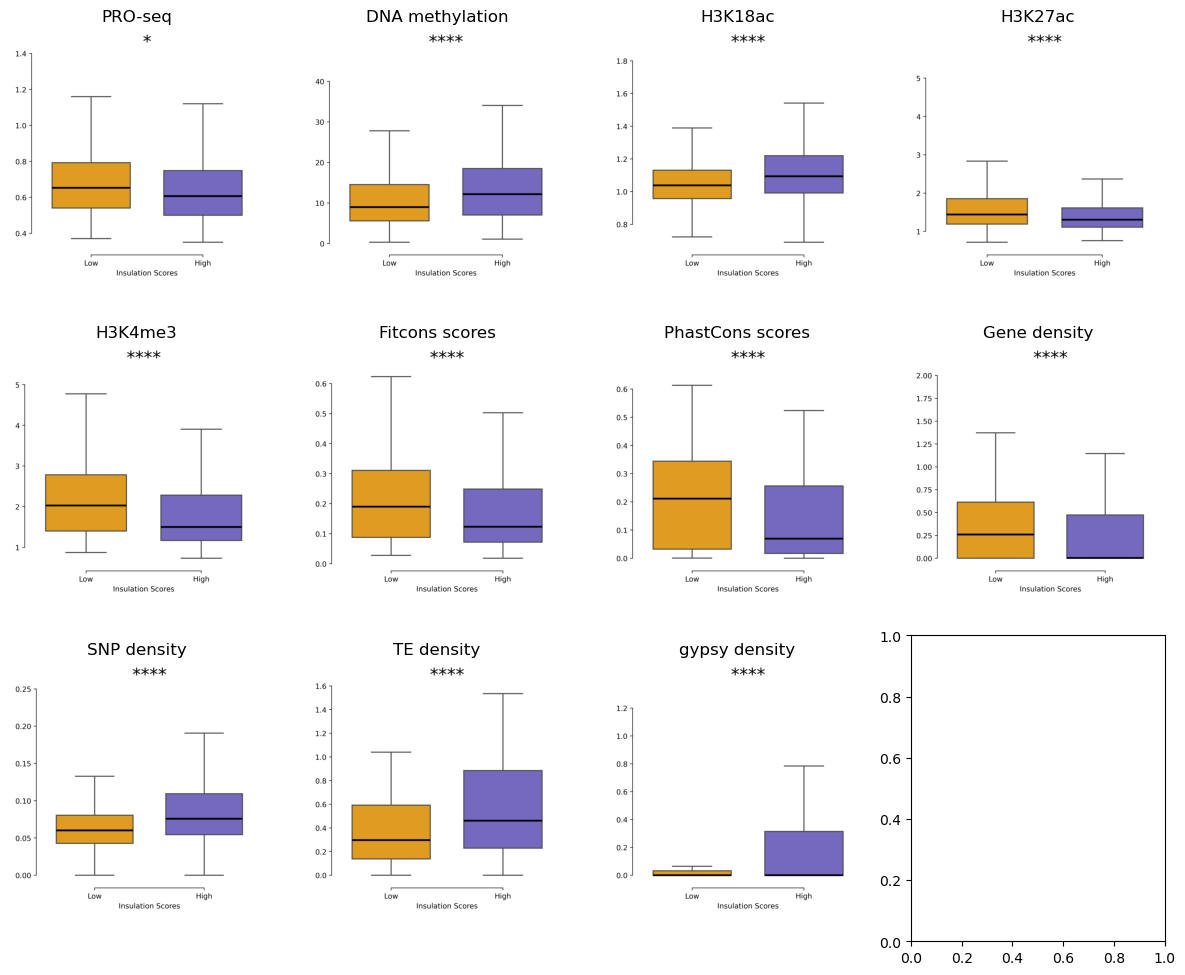

In [22]:
#this combined plot not used for publication, individual pdfs instead
import os
import matplotlib.pyplot as plt
import math

# Directory containing your .png files
png_dir = '/scratch/ak8725/az_mrg/insulation/'

# Define the order and titles for each image
image_order = [
    {'filename': 'pro.png', 'title': 'PRO-seq'},
    {'filename': 'meth.png', 'title': 'DNA methylation'},
    {'filename': 'H3K18ac.png', 'title': 'H3K18ac'},
    {'filename': 'H3K27ac.png', 'title': 'H3K27ac'},
    {'filename': 'H3K4me3.png', 'title': 'H3K4me3'},
    {'filename': 'rho.png', 'title': 'Fitcons scores'},
    {'filename': 'phast.png', 'title': 'PhastCons scores'},
    {'filename': 'genes.png', 'title': 'Gene density'},
    {'filename': 'sv.png', 'title': 'SV breakpoint density'},
    {'filename': 'snp.png', 'title': 'SNP density'},
    {'filename': 'te.png', 'title': 'TE density'},
    {'filename': 'dna_te.png', 'title': 'DNA transposons coverage'},
    {'filename': 'gypsy.png', 'title': 'gypsy density'},
    {'filename': 'copia.png', 'title': 'copia density'},
    {'filename': 'line.png', 'title': 'LINE density'},
    {'filename': 'sine.png', 'title': 'SINE density'},
    {'filename': 'rest_retro_te.png', 'title': 'Other retrotransposons'},
    {'filename': 'ssd.png', 'title': 'SSD genes'},
    {'filename': 'wgd.png', 'title': 'WGD genes'},
    {'filename': 'tips.png', 'title': 'TIPs coverage'},
    {'filename': 'tips_del.png', 'title': 'TIPs del coverage'},
    {'filename': 'tips_ins.png', 'title': 'TIPs ins coverage'},
    {'filename': 'exp.png', 'title': 'RNA-seq'},
]

# Specify the filenames where you want to add an asterisk
filenames_with_asterisk = ['snp.png', 'sine.png', 'rho.png', 'phast.png', 'genes.png', 'gypsy.png', 'copia.png', 'te.png', 'ss.png', 'meth.png', 'H3K27ac.png', 'H3K4me3.png', 'H3K27me3.png']

# Create a dictionary to map filenames to image_info dictionaries
image_info_dict = {entry['filename']: entry for entry in image_order}

# List of filenames sorted in the desired order
sorted_filenames = [
    'pro.png', 'meth.png', 'H3K18ac.png', 'H3K27ac.png',
    'H3K4me3.png', 'rho.png', 'phast.png', 'genes.png', 
    'snp.png', 'te.png', 'gypsy.png'
]

# Calculate the number of rows and columns in the grid based on the number of images
num_images = len(sorted_filenames)
num_cols = 4
num_rows = math.ceil(num_images / num_cols)

# # Specify the height ratio for subplots (reduce the height ratio for tighter rows)
# #height_ratios = [1, 0.6]  # Adjust as needed

# # Calculate the figsize based on the height ratios and number of columns
# fig_width = 12
# fig_height = fig_width * (sum(height_ratios) / num_cols)

# # Create a new figure for the combined image with adjusted height ratio
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), gridspec_kw={'height_ratios': height_ratios})

# Create a new figure for the combined image
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate through the list of filenames and plot images in the specified order
for i, filename in enumerate(sorted_filenames):
    row = i // num_cols
    col = i % num_cols
    img = plt.imread(os.path.join(png_dir, filename))
    
    # Plot the image on the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Turn off axis labels and ticks
    
    # Add an asterisk to the title if the filename is in filenames_with_asterisk
    image_info = image_info_dict.get(filename, {})
    title = image_info.get("title", "")
    
    # Add the title with the optional asterisk
    axes[row, col].set_title(title)

# Adjust spacing between subplots
plt.tight_layout()

# Save the combined image
plt.savefig('/scratch/ak8725/figs/fig5.pdf')

# Show the combined image (optional)
plt.show()